# Declaration of Originality

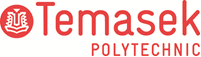

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Jerrica Low Yuin En (2404802G)
* Tutorial Group                : T07
* Tutor						    : Ms Ester
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [302]:
## Import libraries

#Data handling and analysis
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. Business Understanding
Goal: The goal of this project is to develop a supervised machine learning classification model that is able to help me predict whether an indvidual is likely to have diabetes based on medical and health related attirbutes. 

The solution is aimed to spot early detection of diabetes, allowing healthcare professionals to make timely and data driven decisions so that the outcome for patient can be improved.

# 2. Data Understanding

## 2.1 Load dataset

In [303]:
## Read data
FILE_PATH= "diabetes.csv"
df = pd.read_csv(FILE_PATH)

df

,id,age,gender,bmi,glucose,blood_pressure,cholesterol,heart_rate,sleep_hours,physical_activity,smoking,alcohol_intake,family_history,stress_level,diet_score,steps_per_day,work_hours,water_intake_ltr,insulin,diabetes
0,1,69,Male,23.30,170,137,139,66,6.4,High,1,1,1,8,3,8760,6,3.6,33,0
1,2,32,Male,25.00,184,177,250,75,6.4,Medium,0,1,1,4,7,7682,11,4.1,36,0
2,3,89,Female,28.57,87,164,225,102,7.5,Medium,1,0,0,6,5,15025,8,1.4,46,1
3,4,78,Male,15.85,96,113,158,112,6.9,Low,0,1,1,2,7,4645,4,4.4,171,1
4,5,38,Female,35.74,171,122,193,109,7.4,Medium,0,1,0,6,9,7862,13,3.9,235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,88,Female,27.90,164,126,215,98,3.7,Low,1,1,1,7,8,17545,13,5.0,284,0
9996,9997,43,Male,30.69,72,148,206,70,9.1,Low,1,1,0,3,5,1948,5,1.1,211,0
9997,9998,63,Male,32.13,115,158,216,79,8.3,High,1,1,0,4,2,3537,5,4.1,242,0
9998,9999,63,Female,26.00,105,81,213,85,5.7,High,0,0,0,9,10,19295,11,3.5,166,0


## 2.2 Summary Statistics

In [304]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   gender             10000 non-null  object 
 3   bmi                10000 non-null  float64
 4   glucose            10000 non-null  int64  
 5   blood_pressure     10000 non-null  int64  
 6   cholesterol        10000 non-null  int64  
 7   heart_rate         10000 non-null  int64  
 8   sleep_hours        10000 non-null  float64
 9   physical_activity  10000 non-null  object 
 10  smoking            10000 non-null  int64  
 11  alcohol_intake     10000 non-null  int64  
 12  family_history     10000 non-null  int64  
 13  stress_level       10000 non-null  int64  
 14  diet_score         10000 non-null  int64  
 15  steps_per_day      10000 non-null  int64  
 16  work_hours         1000

In [305]:
## Check for missing data
df.isna().sum()

id                   0
age                  0
gender               0
bmi                  0
glucose              0
blood_pressure       0
cholesterol          0
heart_rate           0
sleep_hours          0
physical_activity    0
smoking              0
alcohol_intake       0
family_history       0
stress_level         0
diet_score           0
steps_per_day        0
work_hours           0
water_intake_ltr     0
insulin              0
diabetes             0
dtype: int64

In [306]:
## Describe data distribution
df.describe(include='all')

,id,age,gender,bmi,glucose,blood_pressure,cholesterol,heart_rate,sleep_hours,physical_activity,smoking,alcohol_intake,family_history,stress_level,diet_score,steps_per_day,work_hours,water_intake_ltr,insulin,diabetes
count,10000.00000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5072,NaN,NaN,NaN,NaN,NaN,NaN,3366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,53.539700,NaN,24.986252,133.973400,129.483500,209.343200,89.696100,6.530970,NaN,0.496400,0.503700,0.497200,5.479700,5.498300,10502.639200,8.488000,2.993390,156.008100,0.495600
std,2886.89568,20.757324,NaN,4.900648,37.648549,29.044113,52.140223,17.138626,2.033643,NaN,0.500012,0.500011,0.500017,2.878961,2.887669,5503.030362,2.872678,1.158634,83.766904,0.500006
min,1.00000,18.000000,NaN,7.550000,70.000000,80.000000,120.000000,60.000000,3.000000,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,1000.000000,4.000000,1.000000,10.000000,0.000000
25%,2500.75000,36.000000,NaN,21.630000,101.000000,104.000000,164.000000,75.000000,4.800000,NaN,0.000000,0.000000,0.000000,3.000000,3.000000,5688.000000,6.000000,2.000000,84.000000,0.000000
50%,5000.50000,53.000000,NaN,24.935000,134.000000,129.000000,210.000000,90.000000,6.500000,NaN,0.000000,1.000000,0.000000,5.000000,6.000000,10527.000000,8.000000,3.000000,157.000000,0.000000
75%,7500.25000,72.000000,NaN,28.290000,167.000000,155.000000,255.000000,104.000000,8.300000,NaN,1.000000,1.000000,1.000000,8.000000,8.000000,15271.250000,11.000000,4.000000,229.000000,1.000000


In [307]:
#explain what the above does and why it is important

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

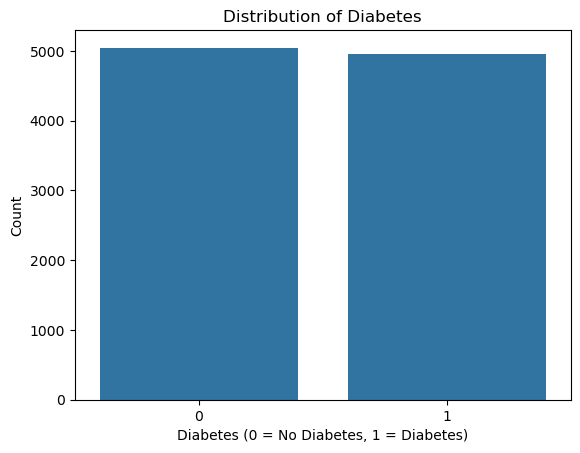

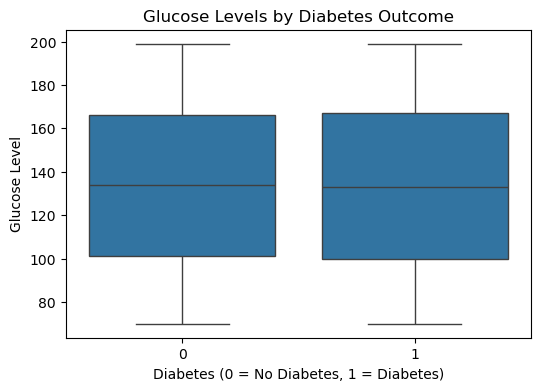

In [308]:
## Understanding distribution of target
col_y = 'diabetes'

df[col_y].value_counts()

#bar chart for target variable
sns.countplot(x=col_y, data=df)
plt.title("Distribution of Diabetes")
plt.xlabel("Diabetes (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")


#boxplot 
plt.figure(figsize=(6, 4))
sns.boxplot(x=col_y, y='glucose', data=df)
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Glucose Level")
plt.show()

In [309]:
#explain the histogram distribution , the boxplot can help to identify what outliers and why it is important 

### 2.3.1.2 Understanding distribution of features

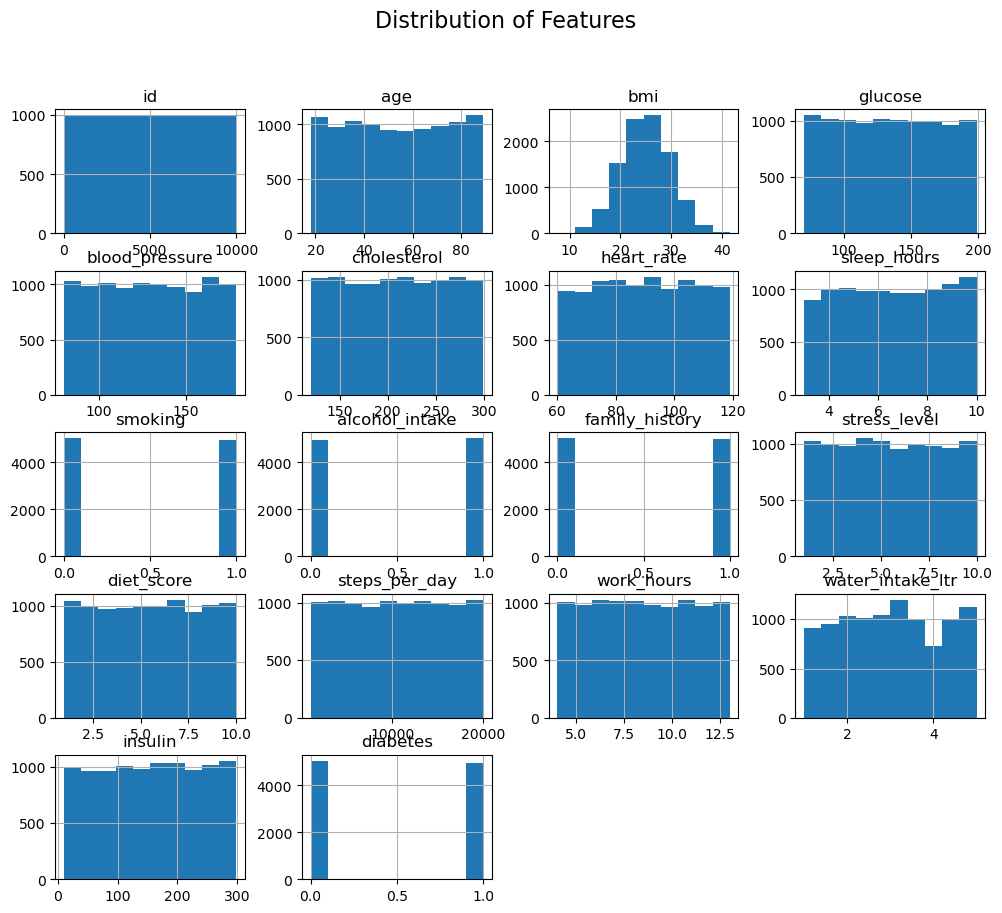

In [310]:
## Understanding distribution of features
df.hist(figsize=(12, 10))

plt.suptitle("Distribution of Features", fontsize=16)
plt.show()

### 2.3.2 Understanding relationship between variables

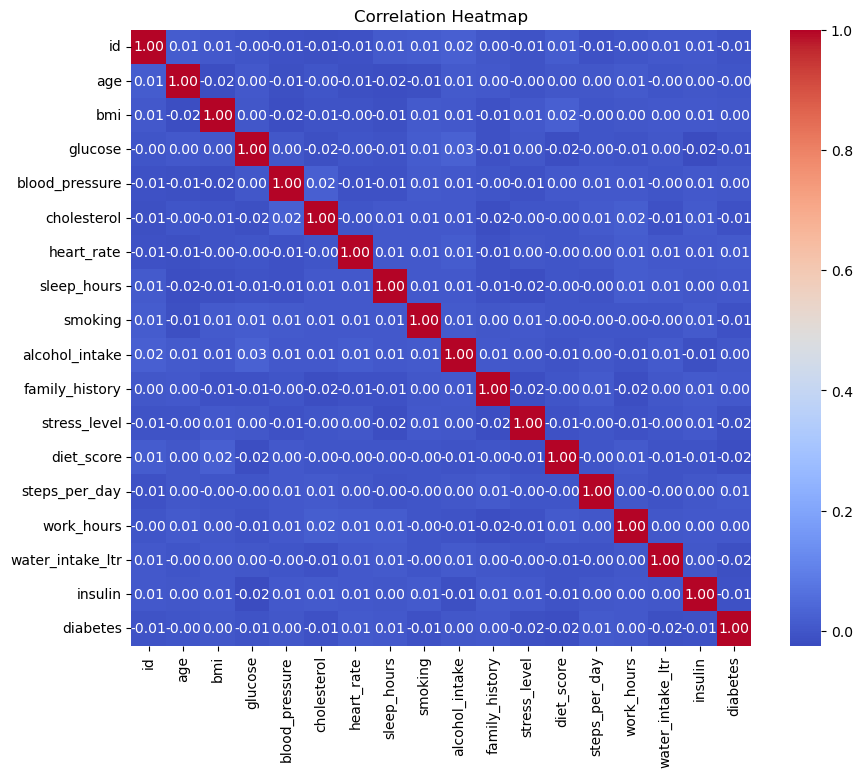

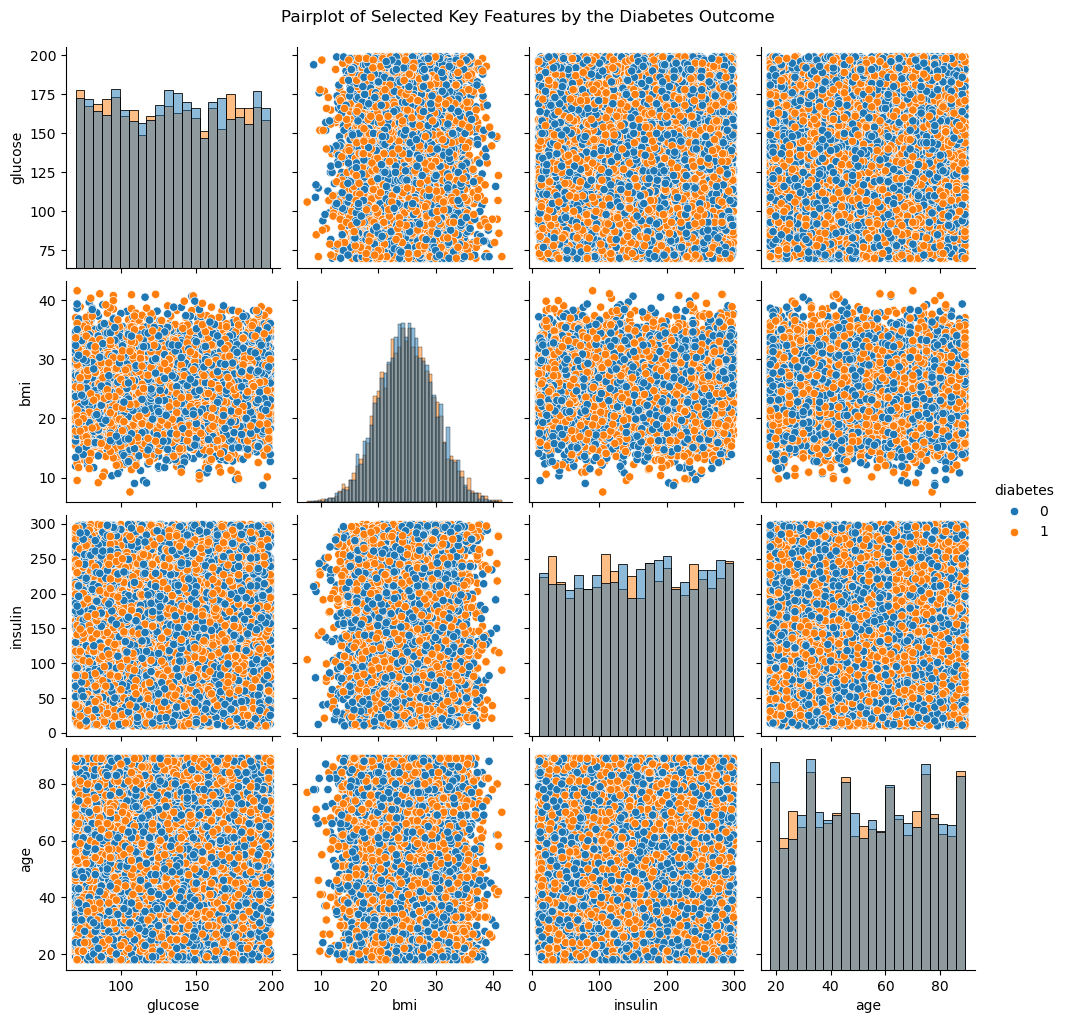

In [311]:
## Understanding relationship between variables

# select only the numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")


#pair plot for the key features vs the diabetes outcome 
selected_features = ['glucose', 'bmi', 'insulin', 'age', 'diabetes']

sns.pairplot(df[selected_features], hue='diabetes', diag_kind='hist')

plt.suptitle("Pairplot of Selected Key Features by the Diabetes Outcome", y=1.02)


plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

In [312]:
## Clean data

#Columns where 0 is NOT a valid value and usually means "missing"
zero_as_missing = ['bmi', 'glucose', 'blood_pressure', 'insulin']

#keep only columns that actually exist in the dataset
zero_as_missing = [col for col in zero_as_missing if col in df.columns]

#create a clean copy of the dataset
df_clean = df.copy()

#replace the 0 with NaN for selected columns 
df_clean[zero_as_missing] = df_clean[zero_as_missing].replace(0, np.nan)

#fill in the missing values with the median of each column 
for column in zero_as_missing:
    df_clean[column] = df_clean[column].fillna(df_clean[column].median())

# confirm no missing values remian
df_clean.isna().sum()

id                   0
age                  0
gender               0
bmi                  0
glucose              0
blood_pressure       0
cholesterol          0
heart_rate           0
sleep_hours          0
physical_activity    0
smoking              0
alcohol_intake       0
family_history       0
stress_level         0
diet_score           0
steps_per_day        0
work_hours           0
water_intake_ltr     0
insulin              0
diabetes             0
dtype: int64

## 3.2 Train-Test Split

In [313]:
## Split data into train set and test set

#target column in your dataset
col_y = 'diabetes'

#sepatrate features and target
selected_features = [
    "age", "bmi", "glucose", "blood_pressure",
    "cholesterol", "insulin", "family_history", "physical_activity"
]
X = df_clean[selected_features]
y = df_clean[col_y]

#one hot encode the categorical columns 
X = pd.get_dummies(X, drop_first=True)

# train-test split so keeping the class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Standardize features (it is important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape


((8000, 9), (2000, 9))

# 4. Modelling

### 4.2 Train Model

In [314]:
## Initialise and train model

#initialise logisitc regression model 
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# train the model using scaled training data
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# 5. Model Evaluation

Accuracy: 0.484
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.60      0.54      1009
           1       0.47      0.36      0.41       991

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000



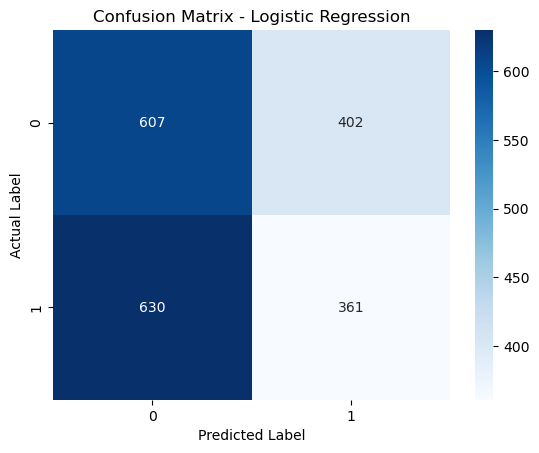

In [315]:
## Evaluate model

#make prediction on test set 
y_pred = log_reg.predict(X_test_scaled)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:" , accuracy)

#classfication report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [316]:
## New data

# e.g. new patient data 
new_data = X.iloc[0] # reuse the first row structure safely
new_data_scaled = scaler.transform([new_data])

## Predict
prediction = log_reg.predict(new_data_scaled)

print("Predicted Diabetes Outcome:" , prediction[0])


Predicted Diabetes Outcome: 1


c:\Users\jerri\anaconda3\envs\mldp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Iterative model development


In [317]:
## Further feature engineering / feature selection
## Iterative model development - Decision Tree Classifier
# Base DT
dt = DecisionTreeClassifier(random_state=42)

# IMPORTANT: remove class_weight='balanced' because it is hurting accuracy here
param_dist = {
    "max_depth": [3, 8, 12],
    "min_samples_split": [2, 10, 50],
    "min_samples_leaf": [1, 5, 10],
    "criterion": ["gini", "entropy"]
}

search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=12,
    scoring="accuracy",
    cv=5,
    random_state=42
)

search.fit(X_train, y_train)

print("Best Params:", search.best_params_)
print("Best CV Accuracy:", search.best_score_)

best_dt = search.best_estimator_

# Evaluate on test set
y_pred_dt = best_dt.predict(X_test)

print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))



Best Params: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 12, 'criterion': 'entropy'}
Best CV Accuracy: 0.506625
Decision Tree Test Accuracy: 0.5045

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.64      0.56      1009
           1       0.50      0.37      0.42       991

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.50      2000

